# One Sample T-Test - Lab

## Introduction
Just as you previously used the t-distribution to provide confidence intervals for estimating the population mean, you can also use similar methods to test whether two populations are different, statistically speaking. To do this, you can use a t-test.

## Objectives
You will be able to:

* Perform a one sample t-test and make conclusions about an experiment based on the results

### Exercise 1: 

Create a function in Python `one_sample_ttest(sample, popmean, alpha)` that will take in sample data (an array of observations), the population mean and the alpha value to calculate and print out the t-statistic, critical t-value, and p-value for the sample and identify if the results are significant or not. The function should also create a visualization using `seaborn` of the distribution to check for normality.

In [1]:
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt


In [2]:

def one_sample_ttest(sample, popmean, alpha):
    # Visualize sample distribution for normality 
    sns.histplot(sample, kde=True, color='blue')
    plt.show()
    
    # Population mean 
    mu = popmean

    # Sample mean (x̄) using NumPy
    x_bar = np.mean(sample)

    # Sample Standard Deviation (s) using Numpy
    s = np.std(sample, ddof=1)  # ddof=1 for sample standard deviation

    # Degrees of freedom
    df = len(sample) - 1
    
    # Calculate the critical t-value
    critical_t = stats.t.ppf(1 - alpha, df)
    
    # Calculate the t-value and p-value      
    t_value, p_value = stats.ttest_1samp(sample, popmean)
    
    # Determine if the results are significant
    if p_value < alpha:
        print(f"t-value: {t_value}, critical t-value: {critical_t}, p-value: {p_value}")
        print("The results are significant; we reject the null hypothesis.")
    else:
        print(f"t-value: {t_value}, critical t-value: {critical_t}, p-value: {p_value}")
        print("The results are not significant; we fail to reject the null hypothesis.")
    
    return None

### Exercise 2:

Use the function created in Exercise 1 to answer the following analytical questions.

In a Python class, some of the students have taken online courses to improve their Python skills.
The scores of a random sample of 20 students who underwent the online-course on a Python test are as follows: 

     [84.0, 92.4, 74.3, 79.4, 86.7, 75.3, 90.9, 86.1, 81.0, 85.1, 
      78.7, 73.5, 86.9, 87.4, 82.7, 81.9, 69.9, 77.2, 79.3, 83.3]

The mean score of the class before the test is 65. The teacher thinks that the online training has really helped the students and now they should perform better than the class (population) mean. Use this to set your null and alternative hypotheses.

1. Test to see if the sample mean is significantly different from 65 at the .05 level. Report the t- and p-values.
2. The researcher realizes that she accidentally recorded the score that should have been 80.9 as 90.9. Are these corrected scores significantly different from 65 at the .05 level?

Bonus: What is the effect size of the first sample compared to the population? How can you interpret this effect size in relation to your significance test?


### Solution:

In [3]:


 """
   - Null Hypothesis (H0): The mean score of students after the online course is 65 or less.
   - Alternative Hypothesis (H1): The mean score of students after the online course is greater than 65.
   
"""


'\n  - Null Hypothesis (H0): The mean score of students after the online course is 65 or less.\n  - Alternative Hypothesis (H1): The mean score of students after the online course is greater than 65.\n  \n'

Test with the initial sample:


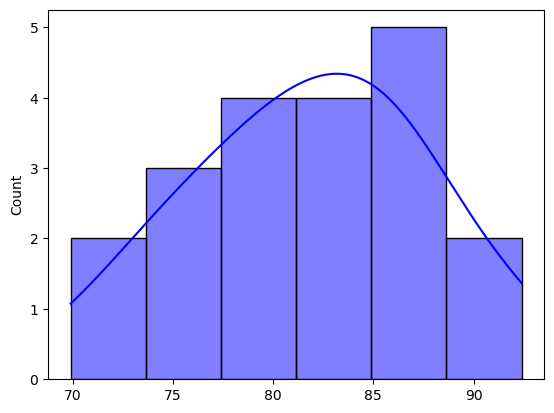

t-value: 12.687592157174493, critical t-value: 1.729132811521367, p-value: 1.0053355594452825e-10
The results are significant; we reject the null hypothesis.

Test with the corrected sample:


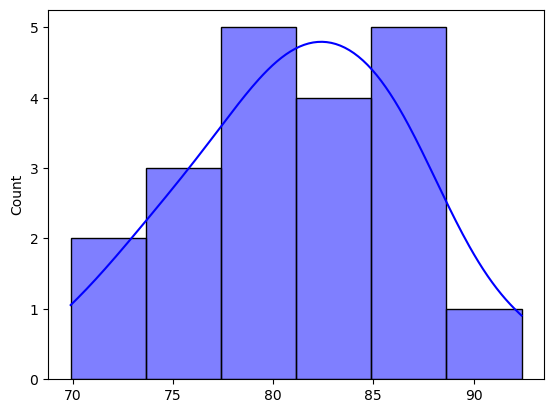

t-value: 13.202088288314906, critical t-value: 1.729132811521367, p-value: 5.083361606682268e-11
The results are significant; we reject the null hypothesis.

Effect size (Cohen's d): 2.837031853423536


In [4]:
# Step 1: Initial sample
sample_scores = [84.0, 92.4, 74.3, 79.4, 86.7, 75.3, 90.9, 86.1, 81.0, 85.1, 
                 78.7, 73.5, 86.9, 87.4, 82.7, 81.9, 69.9, 77.2, 79.3, 83.3]

# Population mean before the test
pop_mean = 65

# Significance level
alpha = 0.05

# Step 2: Test with the initial sample
print("Test with the initial sample:")
one_sample_ttest(sample_scores, pop_mean, alpha)

# Step 3: Correct the sample and retest
corrected_scores = [84.0, 92.4, 74.3, 79.4, 86.7, 75.3, 80.9, 86.1, 81.0, 85.1, 
                    78.7, 73.5, 86.9, 87.4, 82.7, 81.9, 69.9, 77.2, 79.3, 83.3]
print("\nTest with the corrected sample:")
one_sample_ttest(corrected_scores, pop_mean, alpha)

# Bonus: Calculate the effect size (Cohen's d) for the first sample
def cohens_d(sample, mu):
    return (np.mean(sample) - mu) / np.std(sample, ddof=1)

effect_size = cohens_d(sample_scores, pop_mean)
print(f"\nEffect size (Cohen's d): {effect_size}")



## Summary

In this lab, you saw a quick introduction to hypothesis testing using frequentist methods with t-values and p-values. You saw how a one sample t-test can be applied to contexts where the population mean is unknown and you have a limited amount of sample data. You looked at all the stages required for such hypothesis testing with a description of steps and also, how to perform these functions in Python. The lesson also briefly explains the comparison of using p-value for statistical significance vs. effect sizes. 